![fotos de capas de projetos notebooks triple ten (2).png](<attachment:fotos de capas de projetos notebooks triple ten (2).png>)

# *Análise de Viabilidade e Sustentabilidade: Cafeteria Inovadora com Garçons Robôs em Los Angeles.*

### *Descrição do Projeto*

*Nossa cafeteria inovadora em Los Angeles promete uma experiência única, combinando a tradição do café com a tecnologia de garçons robôs. Nesta pesquisa, mergulharemos nos dados de restaurantes em LA para mapear oportunidades e desafios.*

*Exploraremos as preferências dos consumidores e analisaremos a concorrência, tudo para garantir que nossa proposta não seja apenas uma tendência momentânea. A pesquisa será a base para atrair investidores, oferecendo-lhes uma visão clara da viabilidade e sustentabilidade de nossa visão futurista para o mundo dos cafés em Los Angeles.*

### *Descrição dos Dados*

*A tabela ***rest_data*** oferece informações essenciais sobre os estabelecimentos em Los Angeles:*

- ***object_name:*** *Nome único do estabelecimento.*
- ***chain:*** *Indicação de pertencer a uma rede (TRUE/FALSE).*
- ***object_type:*** *Tipo de estabelecimento.*
- ***address:*** *Endereço do estabelecimento.*
- ***number:*** *Número de assentos disponíveis.*

*Esses dados fornecem uma base sólida para nossa análise, permitindo avaliar a presença de redes, entender a diversidade de tipos de estabelecimentos, analisar a localização geográfica e considerar a capacidade média de assentos.*

# *Iniciando Project*

In [194]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Aqui criar tudo com caminho novo aprendido na sprint 9*

In [3]:
# Definindo o caminho do arquivo
path = 'C:/my_workspace/Github/Project_Analise_LA_Restaurantes/data/'

# Carregando arquivo
df = pd.read_csv(path + 'rest_data_us.csv')

# *Começando limpeza e tratamento dos dados*

*Primeiras informações.*

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
df.sample(15)

,id,object_name,address,chain,object_type,number
8630,20416,MUSTARD SEED CAFE,1948 N HILLHURST AVE,False,Restaurant,46
5131,16917,ELECTRIC OWL,1451 N GARDNER ST,False,Restaurant,91
1074,12860,FOOD FOR LIFE INC,401 E 6TH ST,True,Restaurant,28
6853,18639,TRIMANA,633 W 5TH ST # 150,True,Restaurant,7
4453,16239,J.J. BAKERY,3183 WILSHIRE BLVD,True,Bakery,48
350,12136,WOOD HANDCRAFTED PIZZA,2861 W SUNSET BLVD,False,Pizza,47
1081,12867,I LOVE BOBA,1001 S VERMONT AVE STE #111,True,Restaurant,13
3126,14912,THE BURGUNDY ROOM,1621 1/2 N CAHUENGA BLVD,False,Restaurant,5
348,12134,CATALINA'S BAR & GRILL,6725 W SUNSET BLVD,False,Restaurant,185
7140,18926,KENTUCKY FRIED CHICKEN,1789 W JEFFERSON BLVD,True,Fast Food,48


In [6]:
df.shape

(9651, 6)

*Temos 6 colunas e 9651 linhas no dataframe.*

*Vamos olhar os nomes das colunas.*

In [7]:
df.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

*Simplificando nomes de duas colunas.*

In [8]:
df = df.rename(columns={'object_name': 'name', 'object_type': 'type'})
df.head()

,id,name,address,chain,type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


*Sem problemas nos nomes das colunas agora.*

*Vamos observar algumas métricas.*

In [9]:
df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


*Não obtivemos muitas informações relevantes com describe.*

*Iremos procurar por nulos ou duplicados.*

In [10]:
df.duplicated().sum()

0

*Sem duplicados.*

In [11]:
df.isna().sum()

id         0
name       0
address    0
chain      3
type       0
number     0
dtype: int64

*Olhando coluna chain.*

In [12]:
df.chain.value_counts()

False    5972
True     3676
Name: chain, dtype: int64

*Possivelmente na EDA transformaremos a coluna chain em formato binário (0, 1).*

*Por hora, iremos preencher os valores faltantes com a moda.*

In [13]:
df['chain'] = df['chain'].fillna(False)
df.isna().sum()

id         0
name       0
address    0
chain      0
type       0
number     0
dtype: int64

*Coluna type.*

In [14]:
df.type.value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: type, dtype: int64

*Coluna address.*

In [15]:
df.address.value_counts()
len(df.address.value_counts())

8517

*Muitos valores únicos nos endereços.*

*Iremos transformar os endereços para lower case.*

In [16]:
df.address = df.address.str.lower()
df.address.value_counts()

3607 trousdale pkwy            11
135 n grand ave                10
400 world way                   9
5151 state university dr        9
600 world way                   9
                               ..
12746 jefferson blvd            1
3600 wilshire blvd ste 100b     1
308 westwood plz ste a260       1
6333 w 3rd st ste e-11          1
1300 s san pedro st ste 111     1
Name: address, Length: 8513, dtype: int64

*Mesmo processo com a coluna name.*

In [17]:
len(df.name.value_counts())

8672

In [18]:
df.name = df.name.str.lower()
df.name.value_counts()

the coffee bean & tea leaf    47
subway                        31
domino's pizza                15
kentucky fried chicken        14
waba grill                    14
                              ..
bamboo inn                     1
el carmen                      1
cole's                         1
h & h catering pool bar        1
cafe sprouts                   1
Name: name, Length: 8672, dtype: int64

*Para finalizar a etapa de tratemento e limpeza, vamos gerar um histograma de type.*

*E uma overview da nossa análise.*

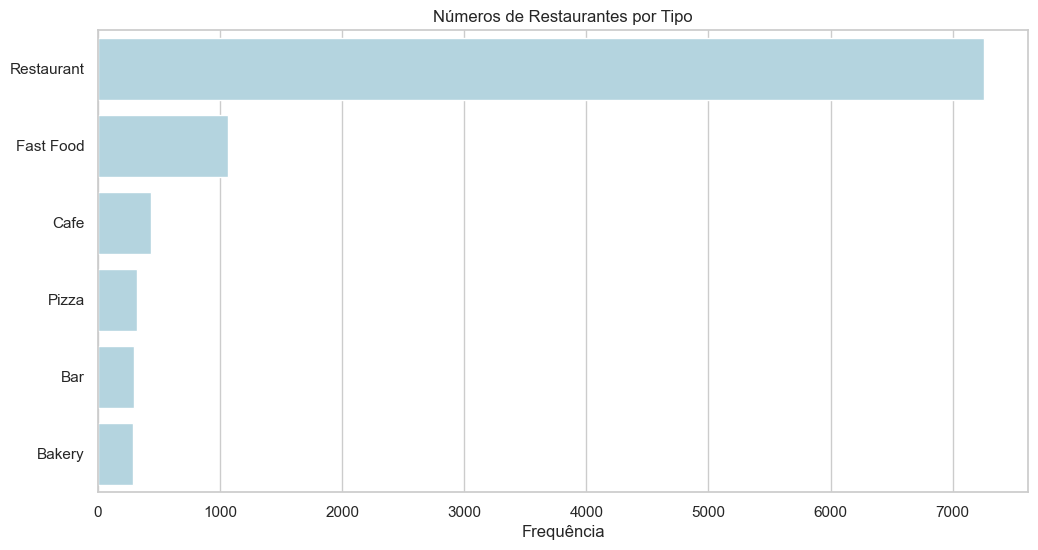

In [19]:
# plotando
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=df.type.value_counts(), y=df.type.value_counts().index, color="lightblue")

plt.title('Números de Restaurantes por Tipo')
plt.xlabel('Frequência')
plt.show()

***Overview:***
- *Nosso dataframe possui 6 colunas e 9651 linhas*
- *Não tínhamos duplicados*
- *Valores nulos mínimos, e os substituímos pela moda na coluna chain*
- *Simplificamos os nomes das colunas*
- *Percebemos que seria melhor transformar os dados das colunas name e type para lower case*
- *Finalizamos a etapa de tratamento e limpeza com um gráfico de barras onde verificamos a distribuição dos tipos de restaurantes*

# *Iniciando Análise exploratória de Dados - EDA*

### *1. Análise das Proporções de Tipos de Estabelecimentos*

*Recordando nossos dados.*

In [20]:
df.head()

,id,name,address,chain,type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


*Vamos calcular as proporções dos tipos de estabelecimentos.*

In [21]:
type_counts = df['type'].value_counts()
prop_type = type_counts / type_counts.sum()

print(round(prop_type * 100, 1))

Restaurant    75.2
Fast Food     11.0
Cafe           4.5
Pizza          3.3
Bar            3.0
Bakery         2.9
Name: type, dtype: float64


*A análise revela que a maioria dos estabelecimentos na lista são ***restaurantes***, com 75.2%, seguidos por ***fast food*** (11.0%), ***cafés*** (4.5%), ***pizzarias*** (3.3%), ***bares*** (3.0%) e ***padarias*** (2.9%).*

*Vamos visualizar gráficamente com barras.*

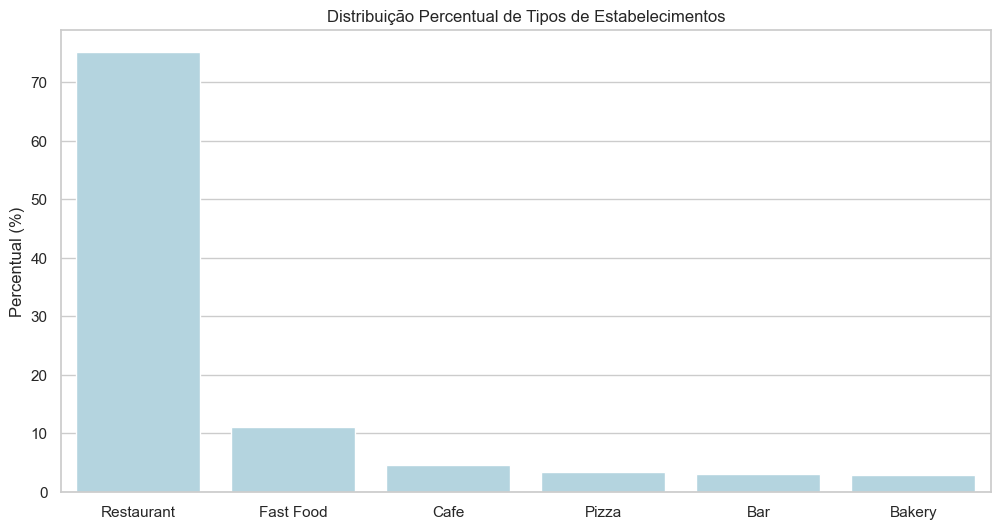

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=prop_type.index, y=prop_type.values * 100, color='lightblue')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual de Tipos de Estabelecimentos')
plt.show()

### *2. Análise das Proporções de Estabelecimentos de Rede e Não Rede*

*Vamos realizar os nossos cálculos.*

In [23]:
prop_chain = df['chain'].value_counts()
prop_chain = prop_chain / prop_chain.sum()

print(round(prop_chain * 100, 1))

False    61.9
True     38.1
Name: chain, dtype: float64


*Contando as proporções de estabelecimentos de rede e não rede, obtivemos 61,9% ***Não Rede*** e 38,1% são estabelecimentos pertencentes a uma determinada ***Rede***.*

*Iremos plotar em barras a comparação.*

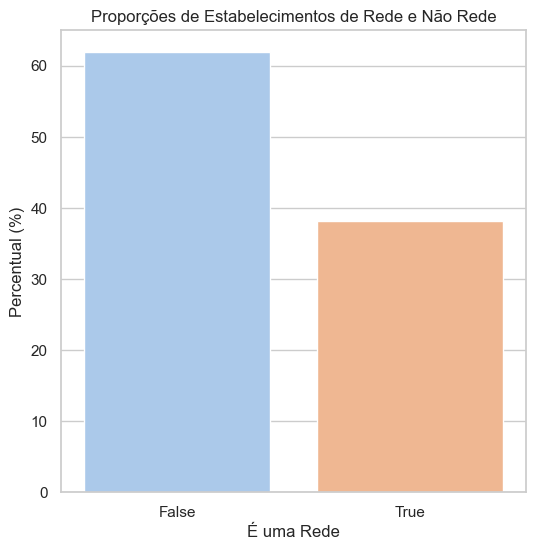

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
sns.barplot(x=prop_chain.index, y=prop_chain.values * 100)

plt.xlabel('É uma Rede')
plt.ylabel('Percentual (%)')
plt.title('Proporções de Estabelecimentos de Rede e Não Rede')
plt.show()

### *3. Análise do Tipo de Estabelecimento Típico para Redes*

*Iremos contruir um pivot table.*

In [25]:
chain_pivot = df[['chain','type','id']]
chain_pivot = pd.pivot_table(chain_pivot,index=['chain','type'], values='id', aggfunc='count')

chain_pivot

id
chain type            
False Bar          215
      Cafe         169
      Fast Food    461
      Pizza        167
      Restaurant  4963
True  Bakery       283
      Bar           77
      Cafe         266
      Fast Food    605
      Pizza        153
      Restaurant  2292

*Existem quase 5 mil ***Restaurantes*** que não pertencem a nenhuma rede. ***Pizzarias*** mantém-se bem distribuídas, já um fato bem interessante, é que todas as padarias ***(Bakery)*** pertencem a alguma rede.*

*Através do gráfico abaixo poderemos visualizar melhor.*

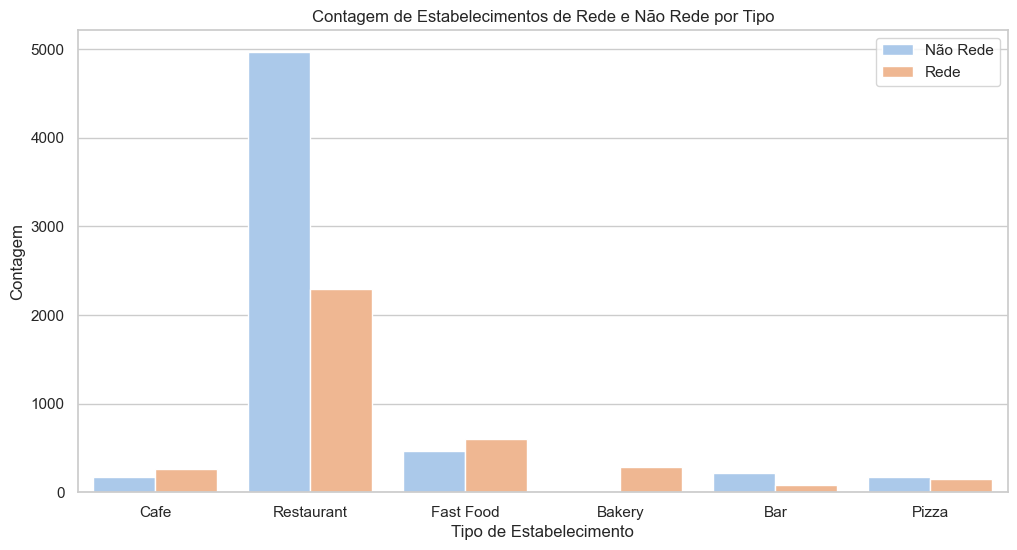

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', hue='chain')

plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.title('Contagem de Estabelecimentos de Rede e Não Rede por Tipo')

plt.legend(labels=['Não Rede', 'Rede'])
plt.show()

***Entendemos que:***
- ****Cafe*** e ***Fast Food*** tem mais estabelecimentos de Rede*
- ***Restaurant*** de Não Rede possuem mais do que o dobro de ***Restaurant*** de Rede*
- ****Bakery*** só tem estabelecimentos de Rede em LA*

### *4. Qual é a característica distintiva das redes de estabelecimentos: muitos locais com poucos assentos ou poucos locais com muitos assentos?*

*Relembrando dados.*

In [27]:
df.head()

,id,name,address,chain,type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


*Iremos realizar alguns filtros para chegar na informação.*

In [28]:
df_chain_seats = df[['id', 'chain', 'number']]
df_chain_seats = df_chain_seats.loc[df_chain_seats['chain'] == True]


df_chain_seats.head()

,id,chain,number
8,11794,True,1
10,11796,True,38
11,11797,True,17
12,11798,True,133
14,11800,True,26


*Agora que temos somente os dados pertinentes para responder a nossa questão.*

*Separando algumas métricas de assentos.*

In [29]:
mean = df_chain_seats.number.mean()
median = df_chain_seats.number.median()
sum = df_chain_seats.number.sum()

print('Estabelecimentos de Rede:')
print(f'Média de assentos -> {mean.round()}')
print(f'Mediana de assentos -> {median}')
print(f'Somatório de assentos -> {sum}')

Estabelecimentos de Rede:
Média de assentos -> 40.0
Mediana de assentos -> 25.0
Somatório de assentos -> 145916


*Com média de assentos de 40.0 e mediana de 25.0, a distribuição sugere assimetria e somatório total de assentos é de 145916.*

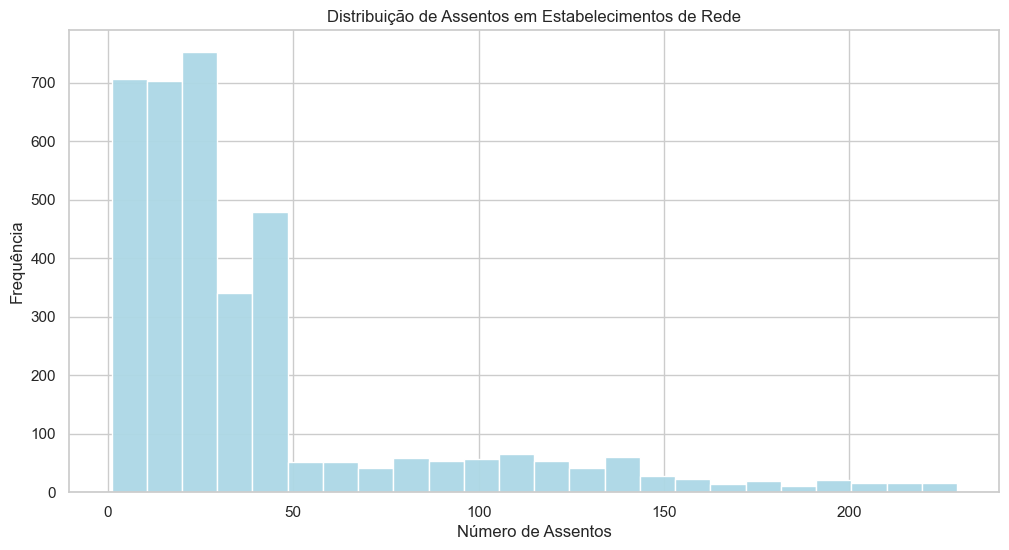

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df_chain_seats['number'], bins=24, color='lightblue', alpha=.96)

plt.title('Distribuição de Assentos em Estabelecimentos de Rede')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.show()

*Definitivamente há uma divisão acima e abaixo de aproximadamente 50 assentos.*

*Vamos ver em porcentagens, filtrando por estabelecimentos com número de assentos igual ou menor que 50.*

In [110]:
less_than_50_seats = df_chain_seats.loc[df_chain_seats['number'] <= 50].count()
less_than_50_seats = less_than_50_seats[1]

prop = less_than_50_seats / df_chain_seats.shape[0]
prop

0.8250816104461371

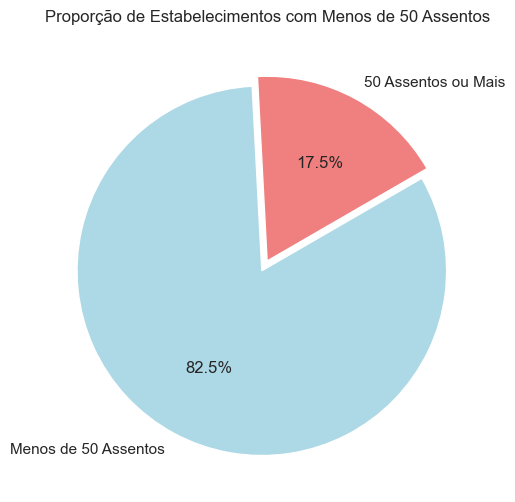

In [112]:
explode = (0.06, 0)
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.pie([prop, 1 - prop], labels=['Menos de 50 Assentos', '50 Assentos ou Mais'],
        autopct='%1.1f%%', startangle=93, explode=explode, colors=colors)

plt.title('Proporção de Estabelecimentos com Menos de 50 Assentos')
plt.show()

*A característica distintiva das redes de estabelecimentos parece ser a predominância de muitos locais com poucos assentos, uma observação que é reforçada pelos gráficos gerados durante a análise.*


### *5. Análise da Média de Assentos por Tipo de Restaurante e quais deles apresentem o maior número de assentos.*

*Calculando a média geral.*

In [33]:
df.number.mean()

43.69516112319967

*Para conseguirmos essa métrica, realizaremos um groupby.*

In [34]:
average_seats_by_restaurant_type = df.groupby('type')['number'].mean()
average_seats_by_restaurant_type.sort_values(ascending=False)

type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

****Restaurantes*** e ***Bares*** apresentam dados acima da média de assentos que é de 43.*

*Demais estabelecimentos ficam abaixo, sendo ***padarias*** e ***cafes*** os que possuem as menores médias.*

In [35]:
# máximo de assentos
df.number.max()

229

In [36]:
# verificando qual tipo
df.loc[df['number'] == df.number.max()]

,id,name,address,chain,type,number
475,12261,mountaingate country club,12445 mountain gate dr,True,Restaurant,229
594,12380,kabuki japanese restaurant,1545 n vine st,True,Restaurant,229
3277,15063,american jewish university,15600 mulhooland dr,False,Restaurant,229
3495,15281,usc university club,705 w 34th st,False,Restaurant,229
4626,16412,playhouse,6506 hollywood blvd,False,Restaurant,229
4854,16640,wokcano downtown l.a.,800 w 7th st,False,Restaurant,229
5091,16877,boulevard 3,6523 w sunset blvd,False,Restaurant,229
7383,19169,manna korean bbq,3986 wilshire blvd,True,Restaurant,229
8699,20485,vibiana,210 s main st,False,Restaurant,229


*Todos os estabelecimentos com o máximo de assentos no nosso dataframe são do tipo ***Restaurant***.*

*Vamos vizualizar as médias de assentos por tipo de estabelecimanto graficamente.*

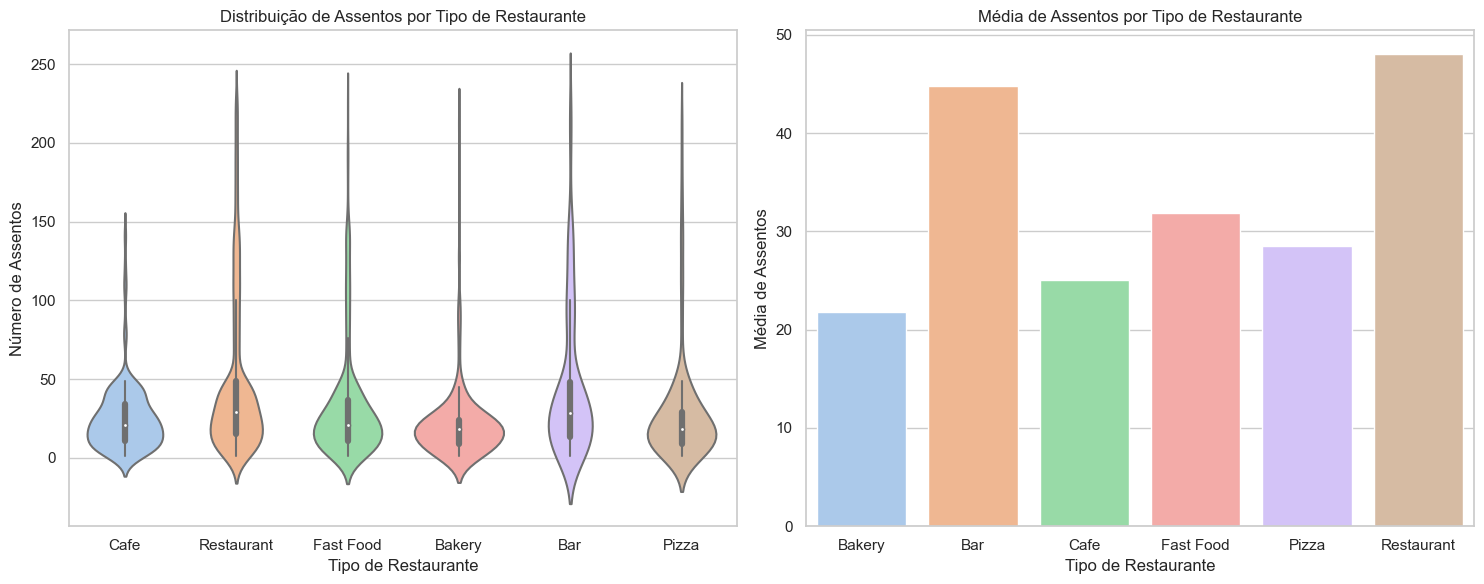

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Violin Plot
sns.violinplot(ax=axes[0], x=df['type'], y=df['number'], palette='pastel')
axes[0].set_title('Distribuição de Assentos por Tipo de Restaurante')
axes[0].set_xlabel('Tipo de Restaurante')
axes[0].set_ylabel('Número de Assentos')

# Bar Plot
sns.barplot(ax=axes[1], x=average_seats_by_restaurant_type.index, y=average_seats_by_restaurant_type.values, order=average_seats_by_restaurant_type.index, palette='pastel')
axes[1].set_title('Média de Assentos por Tipo de Restaurante')
axes[1].set_xlabel('Tipo de Restaurante')
axes[1].set_ylabel('Média de Assentos')

plt.tight_layout()
plt.show()

*Os tipos de estabelecimentos que apresentam os maiores números de assentos são os ***Restaurantes***.*

****Cafes*** e ***Padarias***  são os que possuem menores médias de assentos, mas no geral, as médias variam entre 21 e 48 assentos para qualquer tipo de estabelecimento.*

### *6. Extração de Nomes de Ruas: Organizando Dados da Coluna 'Address' em uma Nova Coluna.*

*Pequena amostra para verificação.*

In [38]:
df.address.sample(15)

6325                 530 e 5th st
344            5214 w sunset blvd
4484        1239 s los angeles st
1976       3277 n san fernando rd
3050        808 s alvarado st # a
5721           1771 westwood blvd
5443              11780 pico blvd
2097         1600 n cahuenga blvd
7970    0928 s western ave # #103
8406           1767 n vermont ave
4277          11705 national blvd
8211       4641 w washington blvd
4234           11688 gateway blvd
2471    6801 hollywood blvd # 418
4545          2511 s san pedro st
Name: address, dtype: object

*Vamos extrair e criar uma nova coluna.*

In [39]:
# extraindo
df['street_number'] = df['address'].str.extract(r'(\d{1,5})\s')

# substituindo os números que extraímos por uma string vazia
df['address'] = df['address'].str.replace(r'(\d{1,5})\s', '')

# verificando
print(df[['address', 'street_number']])

                     address street_number
0          n eagle rock blvd          3708
1            world way # 120           100
2       hollywood blvd # 253          6801
3              w sunset blvd          1814
4              echo park ave          2100
...                      ...           ...
9646            w temple ave           217
9647             melrose ave          5750
9648          hollywood blvd          6741
9649     s spring st ste 100           548
9650  s san pedro st ste 111          1300

[9651 rows x 2 columns]


C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_8652\144439959.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['address'] = df['address'].str.replace(r'(\d{1,5})\s', '')


*Extração concluída.*

### *7. Top 10 Ruas com Maior Número de Restaurantes: Análise Visual.*

*Vamos já plotar um gráfico de barras com as 10 ruas com maior número de estabelecimentos.*

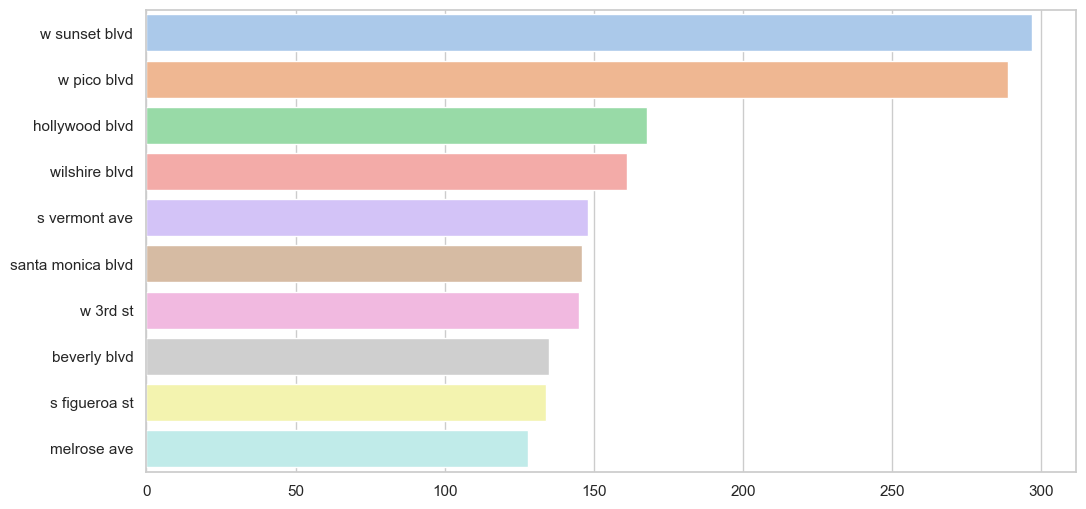

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
top_10_streets = df['address'].value_counts().nlargest(10)
sns.barplot(x=top_10_streets.values, y=top_10_streets.index, palette='pastel')
plt.xticks()
plt.show()

*Encontramos duas ruas que possuem mais de 250 estabelecimentos cada.*
- *Sunset Boulevard*
- *Pico Boulevard*

*Vamos olhar quantos ***Cafes*** & ***Bakery*** existem em cada uma delas.*

In [41]:
sunset_cafe = df.loc[(df['address'] == 'w sunset blvd') & (df['type'] == 'Cafe')]
len(sunset_cafe)

21

In [42]:
sunset_bakery = df.loc[(df['address'] == 'w sunset blvd') & (df['type'] == 'Bakery')]
len(sunset_bakery)

9

In [43]:
pico_cafe = df.loc[(df['address'] == 'w pico blvd') & (df['type'] == 'Cafe')]
len(pico_cafe)

11

In [44]:
pico_bakery = df.loc[(df['address'] == 'w pico blvd') & (df['type'] == 'Bakery')]
len(pico_bakery)

12

*Na Boulevard Sunset temos 21 ***Cafes*** e 9 ***Bakeries***, já na ***Boulevard Pico***, 11 e 9.*

### *8. Identificando Ruas com Apenas um Restaurante.*

*Agrupando e contando.*

In [114]:
establishment_count_per_street = df.groupby('address')['id'].count().reset_index()
establishment_count_per_street = establishment_count_per_street.sort_values(ascending=True, by='id')
establishment_count_per_street = establishment_count_per_street.loc[establishment_count_per_street['id'] == 1]

print("Ruas com exatamente 1 Estabelecimento:", len(establishment_count_per_street))

Ruas com exatamente 1 Estabelecimento: 2473


*Temos muitas ruas com apenas 1 estabelecimento.*

*Vamos verificar quantas ruas tem apenas 1 estabelecimento do tipo ***Restaurant***.*

In [115]:
streets_with_one_restaurant = df[df['type'] == 'Restaurant']
restaurant_counts = streets_with_one_restaurant['address'].value_counts()
streets_with_one_restaurant = restaurant_counts[restaurant_counts == 1].count()

print("Ruas com exatamente 1 Restaurante:", streets_with_one_restaurant)

Ruas com exatamente 1 Restaurante: 1991


### *9. Análise da Distribuição de Assentos em Ruas com Muitos Restaurantes: Tendências e Insights.*

*Vamos construir um dataframe com as médias de assentos.* 

In [168]:
street_seating_distribution = (df
           .groupby('address')
           .agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'})
           .reset_index())

street_seating_distribution.head()

,address,number_of_establishment,avg_number_of_seats
0,1/1st st,1,32.000000
1,1/3rd st,1,19.000000
2,1/7th st,1,49.000000
3,1/beverly blvd,3,28.666667
4,1/city terrace dr,1,1.000000


*Utilizando o nosso recém-criado DataFrame, exploraremos as relações por meio de um gráfico de dispersão empregando a função jointplot do Seaborn.*

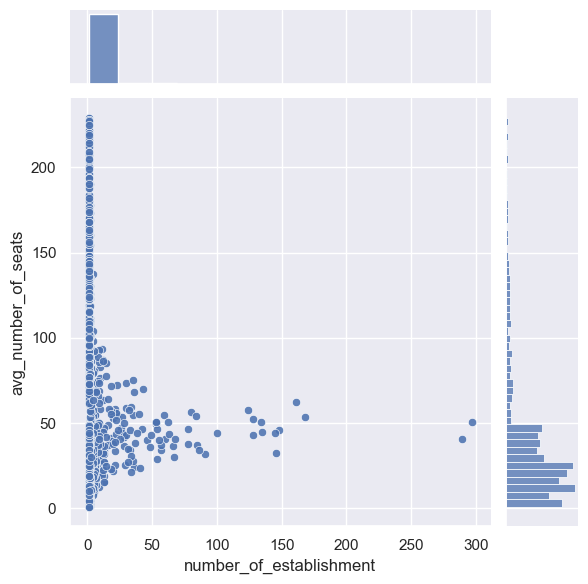

In [179]:
sns.jointplot(data=street_seating_distribution, x='number_of_establishment', y='avg_number_of_seats', kind='scatter', alpha=.87)

*Gerando um histograma somente das médias para verificar.*

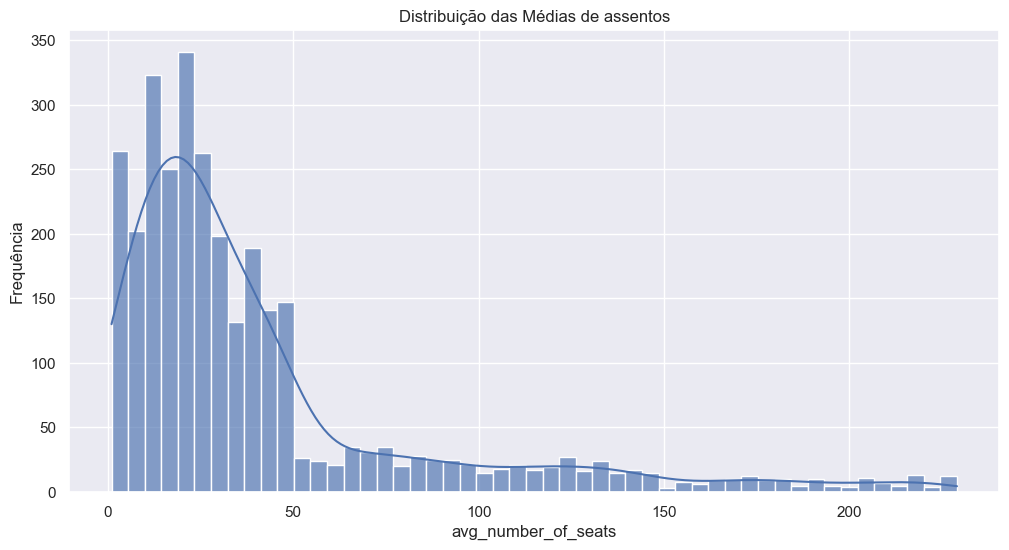

In [176]:
plt.figure(figsize=(12, 6))
sns.histplot(street_seating_distribution['avg_number_of_seats'], kde=True, bins=51, alpha=.66)
plt.title('Distribuição das Médias de assentos')
plt.ylabel('Frequência')
plt.show()

*Outras análises específicas para ***Cafes***.*

In [181]:
recommend_mean_assentos_cafe = df[df['type'] == 'Cafe']['number'].mean()
recommend_max_assentos_cafe = df[df['type'] == 'Cafe']['number'].max()

print(f"Média recomendada de assentos para cafés: {recommend_mean_assentos_cafe}")
print(f"Máximo recomendado de assentos para cafés: {recommend_max_assentos_cafe}")

Média recomendada de assentos para cafés: 25.0
Máximo recomendado de assentos para cafés: 143


*Filtrando ruas com menos e mais concorrência de ***Cafes***.*

In [191]:
# 10 ruas com menor concorrência 
streets_fewest_cafes = df[df['type'] == 'Cafe'].groupby('address').size().sort_values().head(10).index.tolist()

# 10 ruas com maior concorrência
streets_highest_cafe_competition = df[df['type'] == 'Cafe'].groupby('address').size().sort_values(ascending=False).head(10).index.tolist()

*Imprimindo com ciclos for.*

In [192]:
print("10 ruas com menos cafés:")
for street in streets_fewest_cafes:
    print(street)

10 ruas com menos cafés:
1/city terrace dr
s spring st ste r2
s vermont ave ste 103
s virgil ave # 100
s western ave # 131
s western ave g
s western ave ste #145
san julian st
san vicente blvd # 108
san vicente blvd ste 111


In [193]:
print("10 ruas com maior concorrência de cafés:")
for street in streets_highest_cafe_competition:
    print(street)

10 ruas com maior concorrência de cafés:
w sunset blvd
w pico blvd
world way
santa monica blvd
hollywood blvd
westwood blvd
s grand ave
beverly blvd
w 6th st
s figueroa st


# *Conclusão Final*

*Encerramos nossa análise com confiança na singularidade da nossa cafeteria inovadora em Los Angeles.*

*Nossa pesquisa nos dados de restaurantes em LA revelou oportunidades e desafios, mas vamos listar algumas recomendações abaixo.*

#### *Recomendações para a Escolha do Tipo mais Adequado de Restaurante.*

*É aconselhável explorar a possibilidade de estabelecer restaurantes independentes, uma vez que compõem uma parcela significativa (61,9%) do cenário gastronômico de Los Angeles, evidenciando sua presença robusta.*

*Da mesma forma, para cafeterias, recomenda-se a consideração da abertura de estabelecimentos independentes. Cafés desempenham um papel destacado no mercado, e é importante notar que todas as padarias em Los Angeles estão associadas a uma determinada rede.*

#### *Recomendações para o número de assentos.*

*Os restaurantes se destacam por apresentarem os maiores números de assentos, enquanto Cafés e Padarias registram as menores médias de assentos. De maneira geral, as médias variam entre 21 e 48 assentos para todos os tipos de estabelecimentos.*

#### *Perspectivas para o Desenvolvimento de uma Rede de Restaurantes.*

*Duas ruas em Los Angeles se destacam por abrigar mais de 250 estabelecimentos cada: Sunset Boulevard e Pico Boulevard.*

*Escolher algumas destas ruas, ou as listadas no top 10, podem contribuir para o sucesso da cafeteria ou de um restaurante, proporcionando visibilidade e atraindo um público diversificado.*

#### *Link com a Apresentação: https://github....    *